# Parameterisations for Mn, Pb flux from atmosphere

#### NCAR CESM output:

Community Earth System Model (Community Atmosphere Model - CAM https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2013MS000279) output: https://www.earthsystemgrid.org/; CESM1 CAM5 BGC Large Ensemble Atmosphere Post Processed Data, Monthly Averages.

Specific run output: https://www.earthsystemgrid.org/dataset/ucar.cgd.ccsm4.CESM_CAM5_BGC_LE.atm.proc.monthly_ave.html

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import matplotlib

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [14]:
print('Run id: ucar.cgd.ccsm4.CESM_CAM5_BGC_LE')

Run id: ucar.cgd.ccsm4.CESM_CAM5_BGC_LE


For Mode MAM3 (https://www.geosci-model-dev.net/5/709/2012/):
- a1 --- Aitken mode --- 0.015-0.053 $\mu$m
- a2 --- Accumulation mode --- 0.058-0.27 $\mu$m
- a3 --- Coarse mode --- 0.80-3.65 $\mu$m

In [2]:
folder = '/ocean/brogalla/GEOTRACES/data/NCAR/'
bc_a1DDF    = 'b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.bc_a1DDF.185001-200512.nc'
bc_a1SFWET  = 'b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.bc_a1SFWET.185001-200512.nc'
dst_a1DDF   = 'b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.dst_a1DDF.185001-200512.nc'
dst_a1SFWET = 'b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.dst_a1SFWET.185001-200512.nc'
dst_a3DDF   = 'b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.dst_a3DDF.185001-200512.nc'
dst_a3SFWET = 'b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.dst_a3SFWET.185001-200512.nc'

bc_a1DDF    = nc.Dataset(folder+bc_a1DDF)
bc_a1SFWET  = nc.Dataset(folder+bc_a1SFWET)
dst_a1DDF   = nc.Dataset(folder+dst_a1DDF)
dst_a1SFWET = nc.Dataset(folder+dst_a1SFWET)
dst_a3DDF   = nc.Dataset(folder+dst_a3DDF)
dst_a3SFWET = nc.Dataset(folder+dst_a3SFWET)

In [3]:
BC_a1DDF = bc_a1DDF.variables['bc_a1DDF']
BC_a1SFWET = bc_a1SFWET.variables['bc_a1SFWET']

In [4]:
dst_a1DDF = dst_a1DDF.variables['dst_a1DDF']
dst_a1SFWET = dst_a1SFWET.variables['dst_a1SFWET']
dst_a3DDF = dst_a3DDF.variables['dst_a3DDF']
dst_a3SFWET = dst_a3SFWET.variables['dst_a3SFWET']

In [5]:
lon  = bc_a1DDF.variables['lon']
lat  = bc_a1DDF.variables['lat']
date = bc_a1DDF.variables['date']

In [6]:
mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12_mask.nc')
tmask = mask.variables['tmask']
tmask = np.array(tmask[0,:,:,:])
mlons = mask.variables['nav_lon']
mlats = mask.variables['nav_lat']
mlons = np.array(mlons)
mlats = np.array(mlats)
cond = (tmask > 0.1) 
Z_masked = np.ma.masked_where(cond, tmask) 

In [7]:
def plot_var(var, varname, vmin1, vmax1, lon=lon, lat=lat, mlons=mlons, mlats=mlats):
    fig, ax1 = plt.subplots(1,1,figsize=(10,9))

    proj1=Basemap(projection='eqdc',lat_0 = 77.5, lon_0 = -93, resolution='i', width=3.5e6, height=2.68e6)
    x_mask, y_mask = proj1(mlons, mlats)

    cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
    proj1.pcolor(x_mask,y_mask,Z_masked[0,:,:], vmin=-1, zorder=3, vmax = 0.3, cmap=cmap1)#cmocean.cm.matter_r)   

    dlon, dlat = np.meshgrid(np.array(lon), np.array(lat))
    x,y = proj1(dlon,dlat)
    CS1 = proj1.pcolor(x, y, np.array(var[1870,:,:])*10**3, zorder=1, vmin=vmin1, vmax=vmax1, cmap=cmocean.cm.deep)
    cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 
    CBar = plt.colorbar(CS1, ax=ax1, cax=cbaxes) 
    CBar.ax.tick_params(axis='y', length=0)
    CBar.ax.set_ylabel('g/m2/s')

    ax1.set_title(varname+': 20151201')
    ax1.set_xlabel('lon')
    ax1.set_ylabel('lat')
    return

#### Black carbon:

In [8]:
print(bc_a1DDF.variables['bc_a1DDF'])
print(bc_a1SFWET.variables['bc_a1SFWET'])

<class 'netCDF4._netCDF4.Variable'>
float32 bc_a1DDF(time, lat, lon)
    units: kg/m2/s
    long_name: bc_a1 dry deposition flux at bottom (grav + turb)
    cell_methods: time: mean
unlimited dimensions: time
current shape = (1872, 192, 288)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 bc_a1SFWET(time, lat, lon)
    units: kg/m2/s
    long_name: Wet deposition flux at surface
    cell_methods: time: mean
unlimited dimensions: time
current shape = (1872, 192, 288)
filling on, default _FillValue of 9.969209968386869e+36 used



/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


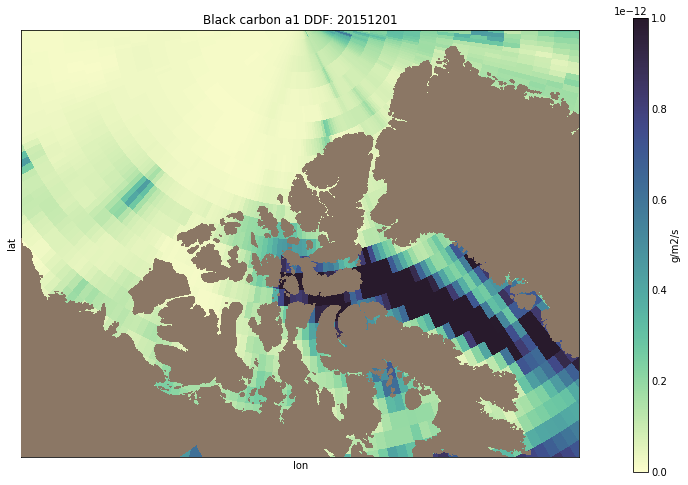

In [12]:
plot_var(BC_a1DDF, 'Black carbon a1 DDF', 0, 1e-12)

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


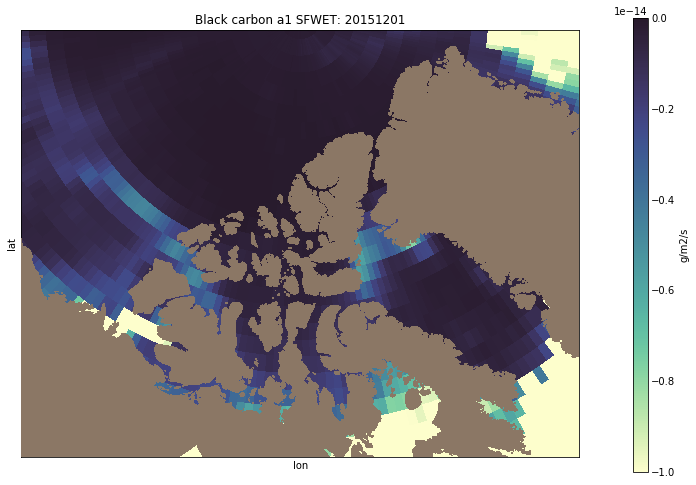

In [25]:
plot_var(BC_a1SFWET, 'Black carbon a1 SFWET', -1e-14, 0)

#### Mineral dust:

In [5]:
print(dst_a1DDF.variables['dst_a1DDF'])
print(dst_a1SFWET.variables['dst_a1SFWET'])
print(dst_a3DDF.variables['dst_a3DDF'])
print(dst_a3SFWET.variables['dst_a3SFWET'])

<class 'netCDF4._netCDF4.Variable'>
float32 dst_a1DDF(time, lat, lon)
    units: kg/m2/s
    long_name: dst_a1 dry deposition flux at bottom (grav + turb)
    cell_methods: time: mean
unlimited dimensions: time
current shape = (1872, 192, 288)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 dst_a1SFWET(time, lat, lon)
    units: kg/m2/s
    long_name: Wet deposition flux at surface
    cell_methods: time: mean
unlimited dimensions: time
current shape = (1872, 192, 288)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 dst_a3DDF(time, lat, lon)
    units: kg/m2/s
    long_name: dst_a3 dry deposition flux at bottom (grav + turb)
    cell_methods: time: mean
unlimited dimensions: time
current shape = (1872, 192, 288)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 dst_a3SFWET(time, lat, lon)
    units: kg/m2/s
    long_

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


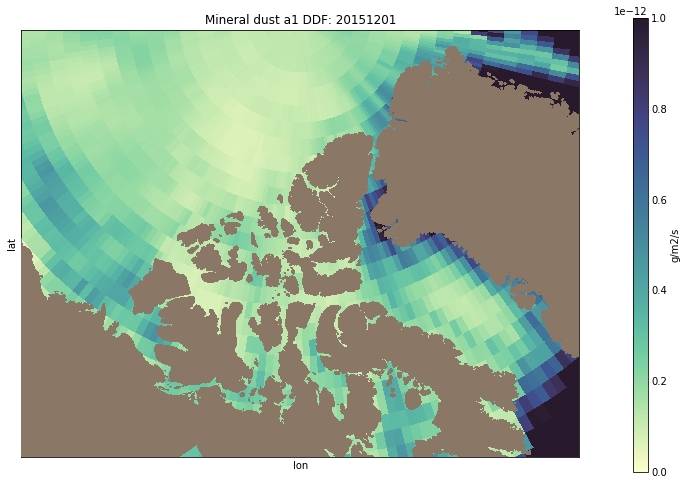

In [18]:
plot_var(dst_a1DDF, 'Mineral dust a1 DDF', 0, 1e-12)

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


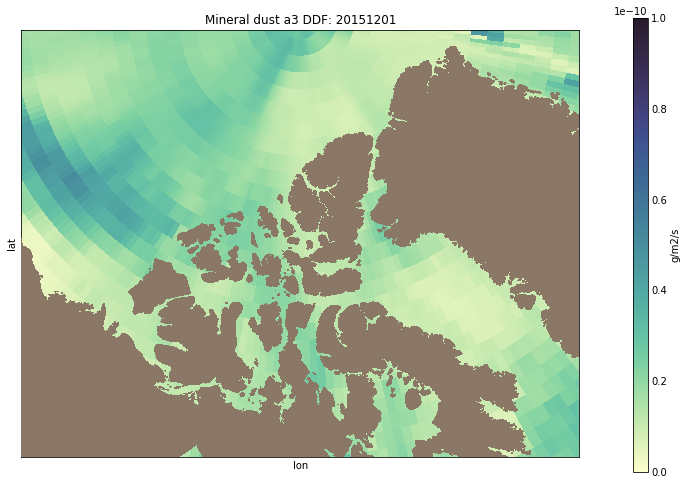

In [22]:
plot_var(dst_a3DDF, 'Mineral dust a3 DDF', 0, 1e-10)

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


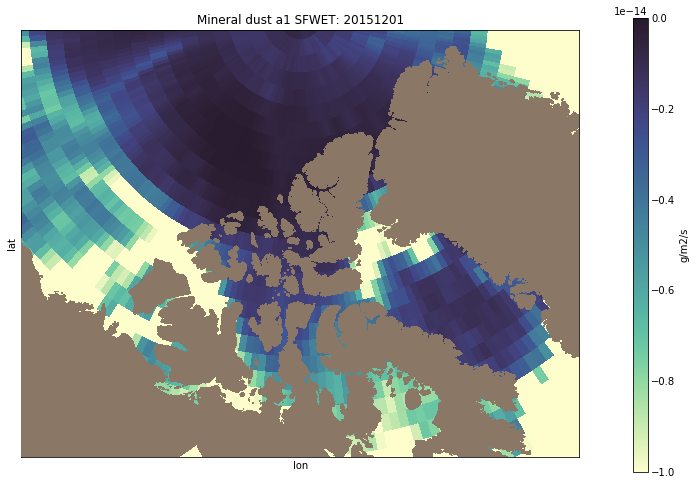

In [15]:
plot_var(dst_a1SFWET, 'Mineral dust a1 SFWET', -1e-14, 0)

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


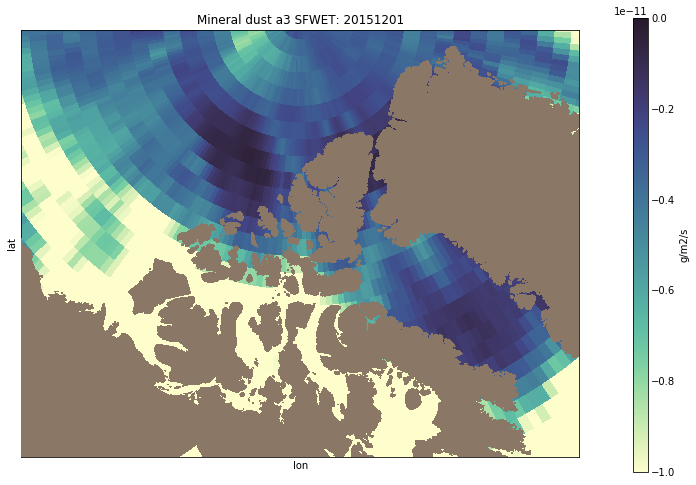

In [10]:
plot_var(dst_a3SFWET, 'Mineral dust a3 SFWET', -1e-11, 0)

# Quantifying fractions of Mn and Pb in dust & black carbon:

#### Atmospheric sources:

Mahowald, Natalie M., et al. "Aerosol trace metal leaching and impacts on marine microorganisms." Nature communications 9.1 (2018): 2614. https://www.nature.com/articles/s41467-018-04970-7

Mn consists of approximately:
- 90% mineral dust
- 5% anthropogenic
- 5% other

And Pb of:
- 72% anthropogenic
- 20% fire
- 4% mineral dust
- 4% other

<img src="files/props.png" style="width: 600px;">

Solubility of Pb: 30%

Solubility of Mn: 40%

" Aerosol metal solubility is influenced by atmospheric processes that occur before aerosol particles are deposited on the ocean surface. These atmospheric processes can be quite variable across different metals;
however, most studies have focused on iron. In remote regions, the solubility of iron can be quite high (Fig. 3b), and observations suggest that under some circumstances iron solubility in dust increases as it travels downwind(Fig. 3d)"

<img src="files/solubility.png" style="width: 600px;">

#### Transport method:

Also check: https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JD090iD01p02391, https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JC088iC11p06752

<img src="files/table.png" style="width: 600px;">

###  Parameterisation:

So far, it seems that I will need to assume fraction Mn in wet deposition = fraction Mn in dry deposition (no measurements)

For Pb:
\begin{equation}
tra_{atm} = tf \cdot A \cdot S_{Pb} \cdot p_{anthro} \cdot F_{pb:bc} \cdot (DDF_{bc} + SFWET_{bc})
\end{equation}

Components:
- $tf$ --- transport factor that indicates distance from the source region
- A --- area of surface grid cell
- $S_{Pb}$ --- solubility of Pb --- 30% $\rightarrow$ 0.30
- $p_{anthro}$ --- proportion anthropogenic --- 92% (might not need to use, depending on relation developed between Pb and black carbon
- $F_{Pb:bc}$ --- relation between Pb and black carbon
- $DDF_{bc}$ --- dry deposition flux of black carbon
- $SFWET_{bc}$ --- wet deposition flux of black carbon

For Mn:
\begin{equation}
tra_{atm} = tf \cdot A \cdot S_{Mn} \cdot p_{dust} \cdot F_{Mn:dust}  \cdot (DDF_{dust} + SFWET_{dust})
\end{equation}

Units:
\begin{equation}
\frac{mol}{s} = non \cdot m^2 \cdot non \cdot ppm  \cdot \frac{mol}{kg} \cdot (\frac{kg}{m^2\ s} + \frac{kg}{m^2\ s})
\end{equation} 

Components:
- $tf$ --- transport factor that indicates distance from the source region (affects solubility)
- A --- area of surface grid cell
- $S_{Mn}$ --- solubility of Mn --- 40% $\rightarrow$ 0.40
- $p_{dust}$ --- proportion from mineral dust --- 90%
- $F_{Mn:dust}$ --- relation between Mn and dust --- crustal ratio: 527 ppm
- $DDF_{dust}$ --- dry deposition flux of dust
- $SFWET_{dust}$ --- wet deposition flux of dust

# Relation between Pb in Black Carbon:

Pb measurements: https://link.springer.com/content/pdf/10.1007%2FBF00118349.pdf

The seasonal variation of the weekly average concentrations of aerosol lead in the lower Arctic troposphere at Alert in the high Arctic. Each box represents the distribution of approximately 12 weekly average concentrations
for a half month period between 1980 and 1986. 

In [ ]:
Pb = [4, 3.75, 2.5, 2.3, 3.3, 3.2, 3.2, 2.2, 1, 0.3, 0.2, 0.2, 0.2, 0.2, \
     0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.7, 0.6, 0.9, 1.7] # median value in nano g / m3
upper_q = [5.1, 4.5, 5.3, 4, 4.4, 5.5, 4, 2.3, 1, 0.35, 0.2, 0.2, 0.2, 0.2, \
          0.35, 0.2, 0.2, 0.2, 0.2, 0.5, 0.9, 0.9, 1.7, 2.0] # upper quartile
lower_q = [2.0, 2.5, 1.8, 1.2, 1.8, 2.4, 1.7, 1.5, 0.4, 0.15, 0.15, 0.15, 0.15, 0.15, \
          0.2, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.3, 0.3, 1.3] # lower quartile

Source: Sharma, S., et al. "Variations and sources of the equivalent black carbon in the high Arctic revealed by long‐term observations at Alert and Barrow: 1989–2003." Journal of Geophysical Research: Atmospheres 111.D14 (2006). https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2005JD006581# 

Long‐term trends at Alert and Barrow for all the year, winter months, and summer months. 

<img src="files/jgrd12586-fig-0002_edit.png" style="width: 900px;">

In [19]:
EBC_alert = [73, 69, 60, 55, 40, 35, 33, 31, 27, 26, 25, 26, 28, 29, 30] # all the year
EBC_barrow = [37, 36, 35, 35, 33, 31, 30, 26, 25, 24, 21, 22, 24, 29, 41]
year = np.arange(1990, 2005, 1)

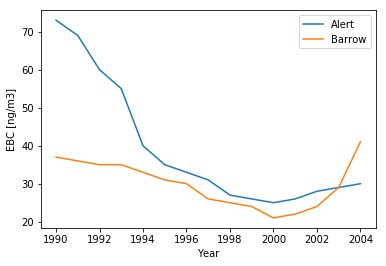

In [20]:
plt.plot(year, EBC_alert, label='Alert')
plt.plot(year, EBC_barrow, label='Barrow')
plt.xlabel('Year')
plt.ylabel('EBC [ng/m3]')
plt.legend()

Seasonal cycle:

<img src="files/jgrd12586-fig-0003.png" style="width: 400px;">

Gong, S. L., et al. "Identification of trends and interannual variability of sulfate and black carbon in the Canadian High Arctic: 1981–2007." Journal of Geophysical Research: Atmospheres 115.D7 (2010). https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2009JD012943

Trends and seasonal variations of sulfate and black carbon (BC) aerosols at Alert, Canada.Weekly integrated data of sulfate by an ion chromatography from a high volume sampler [Sirois andBarrie, 1999] and weekly averaged BC data presented here were measured by aethalometer and adjustedto elemental carbon concentrations derived from a thermal method [Sharma et al., 2004].

<img src="files/bc.png" style="width: 1000px;">